<a href="https://colab.research.google.com/github/SondipPoulSingh/Machine-Learning/blob/main/different_eye_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dataset from kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d dhirajmwagh1111/dataset-for-different-eye-disease
# command from the dataset API https://www.kaggle.com/datasets/dhirajmwagh1111/dataset-for-different-eye-disease

100% 2.34G/2.34G [01:21<00:00, 30.4MB/s]
100% 2.34G/2.34G [01:21<00:00, 30.8MB/s]


In [3]:
from zipfile import ZipFile

In [5]:
with ZipFile('/content/dataset-for-different-eye-disease.zip','r') as zip:
  zip.extractall('/content')

### Generator


If the RAM is not sufficient then it creates problem to load all the images to the model.The reason of using generator is to load a subsample of images instead of loading all the images at the same time. image_dataset_from_directory is one of the generators provided by keras.<br>
***official documentation:***
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

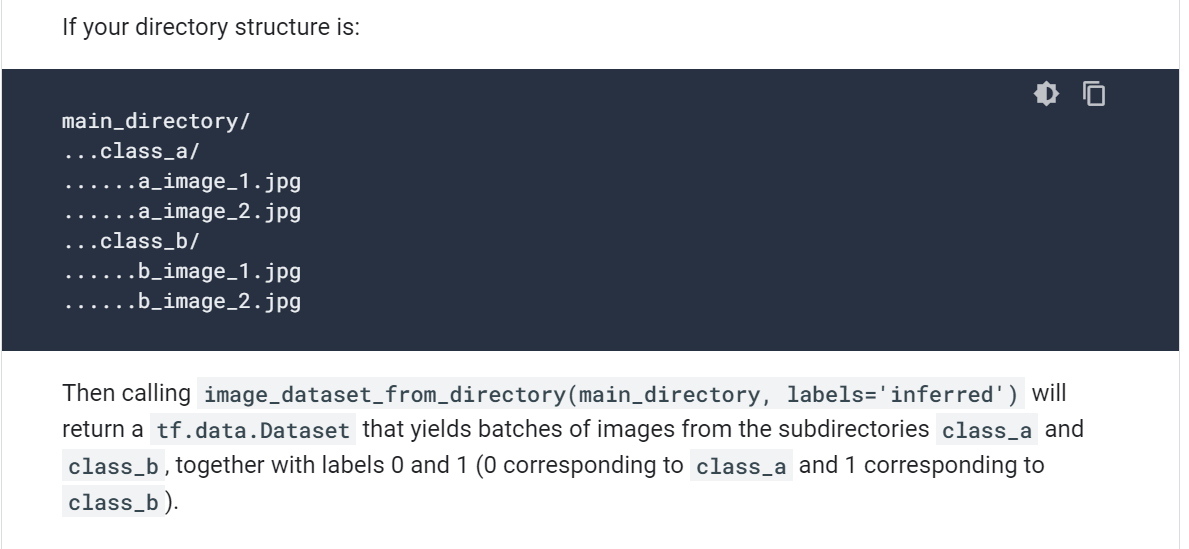

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
train_datagen = tf.keras.utils.image_dataset_from_directory(
    '/content/DATASET_101/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )

test_datagen = tf.keras.utils.image_dataset_from_directory(
    '/content/DATASET_101/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )

Found 8429 files belonging to 6 classes.
Found 1395 files belonging to 6 classes.


Here train_datagen and test_datagen works as generator. Each time they load a batch_size of 32 images. Generators remembers where they finish each time. so all the image batchs take places one after another. Both generator loads images as numpy array and the pixel values lie between 0-255.

In [8]:
# Normalizing the generator data
def normalize(image, label):
  data = tf.cast(image/255. ,tf.float32)
  return image,label

train_datagen_normalized = train_datagen.map(normalize)
test_datagen_normalized = test_datagen.map(normalize)

### CNN Model

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [16]:
history = model.fit(train_datagen_normalized, epochs=5, validation_data=test_datagen_normalized)

Epoch 1/5
264/264 [==============================] - 125s 458ms/step - loss: 1.5792 - accuracy: 0.9068 - val_loss: 1.0386 - val_accuracy: 0.9118
Epoch 2/5
264/264 [==============================] - 125s 464ms/step - loss: 0.5509 - accuracy: 0.9279 - val_loss: 0.5816 - val_accuracy: 0.9082
Epoch 3/5
264/264 [==============================] - 124s 457ms/step - loss: 0.3582 - accuracy: 0.9359 - val_loss: 0.2933 - val_accuracy: 0.9147
Epoch 4/5
264/264 [==============================] - 123s 456ms/step - loss: 0.2050 - accuracy: 0.9396 - val_loss: 0.2307 - val_accuracy: 0.9154
Epoch 5/5
264/264 [==============================] - 124s 459ms/step - loss: 0.2177 - accuracy: 0.9429 - val_loss: 0.7840 - val_accuracy: 0.9168


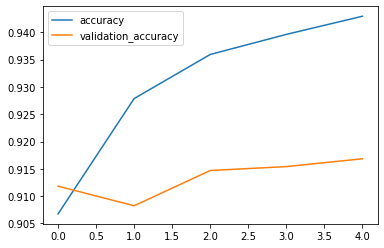

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()